# Keyword vs target

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.mstats as sp
%matplotlib inline

In [9]:
train = pd.read_csv('train.csv')

Pasamos a analizar si existen correlaciones entre las keywords y la ocurrencia o no de un siniestro (target). Para ello agrupamos los datos por target y los reordenamos como en la siguiente tabla (sólo mostramos los primeros y últimos 5 registros).

In [10]:
# Agrupo por target
grouped = train.groupby(['target'])

# reordenamos
g_unstack = grouped['keyword'].value_counts().unstack().T.fillna(0)
g_unstack['0+1'] = g_unstack[0] + g_unstack[1]
g_sort_1 = g_unstack.sort_values(by=1)

# generamos índice de "correlación" keyword vs target
g_sort_1['delta/suma'] = (g_sort_1[1] - g_sort_1[0]) / (g_sort_1[1] + g_sort_1[0])
g_sort_ds = g_sort_1.sort_values(by='delta/suma')
g_sort_ds

target,0,1,0+1,delta/suma
keyword,,,,
aftershock,34.0,0.0,34.0,-1.000000
body%20bags,40.0,1.0,41.0,-0.951220
ruin,36.0,1.0,37.0,-0.945946
blazing,33.0,1.0,34.0,-0.941176
body%20bag,32.0,1.0,33.0,-0.939394
...,...,...,...,...
oil%20spill,1.0,37.0,38.0,0.947368
outbreak,1.0,39.0,40.0,0.950000
debris,0.0,37.0,37.0,1.000000


Las keywords quedan entonces como índices. Para cada una de ellas se denota, en las primeras dos columnas, la cantidad de registros en que están asociadas con valores de target iguales a 0 ó 1. En la tercera columna se suman los valores de la primera y la segunda (total de apariciones de cada keyword). En la cuarta calculamos un índice de la asociación de cada keyword con target = 0 (t0) ó target = 1 (t1): (t1 - t0) / (t1 + t0). Cuanto más cercano a 1, más asociada está la keyword a un evento real, cuanto más cercano a -1, más asociada a uno ficticio.

Ahora graficamos la tabla anterior, ordenada por delta/suma de manera descendente.

Text(0.5, 0, 'delta/suma')

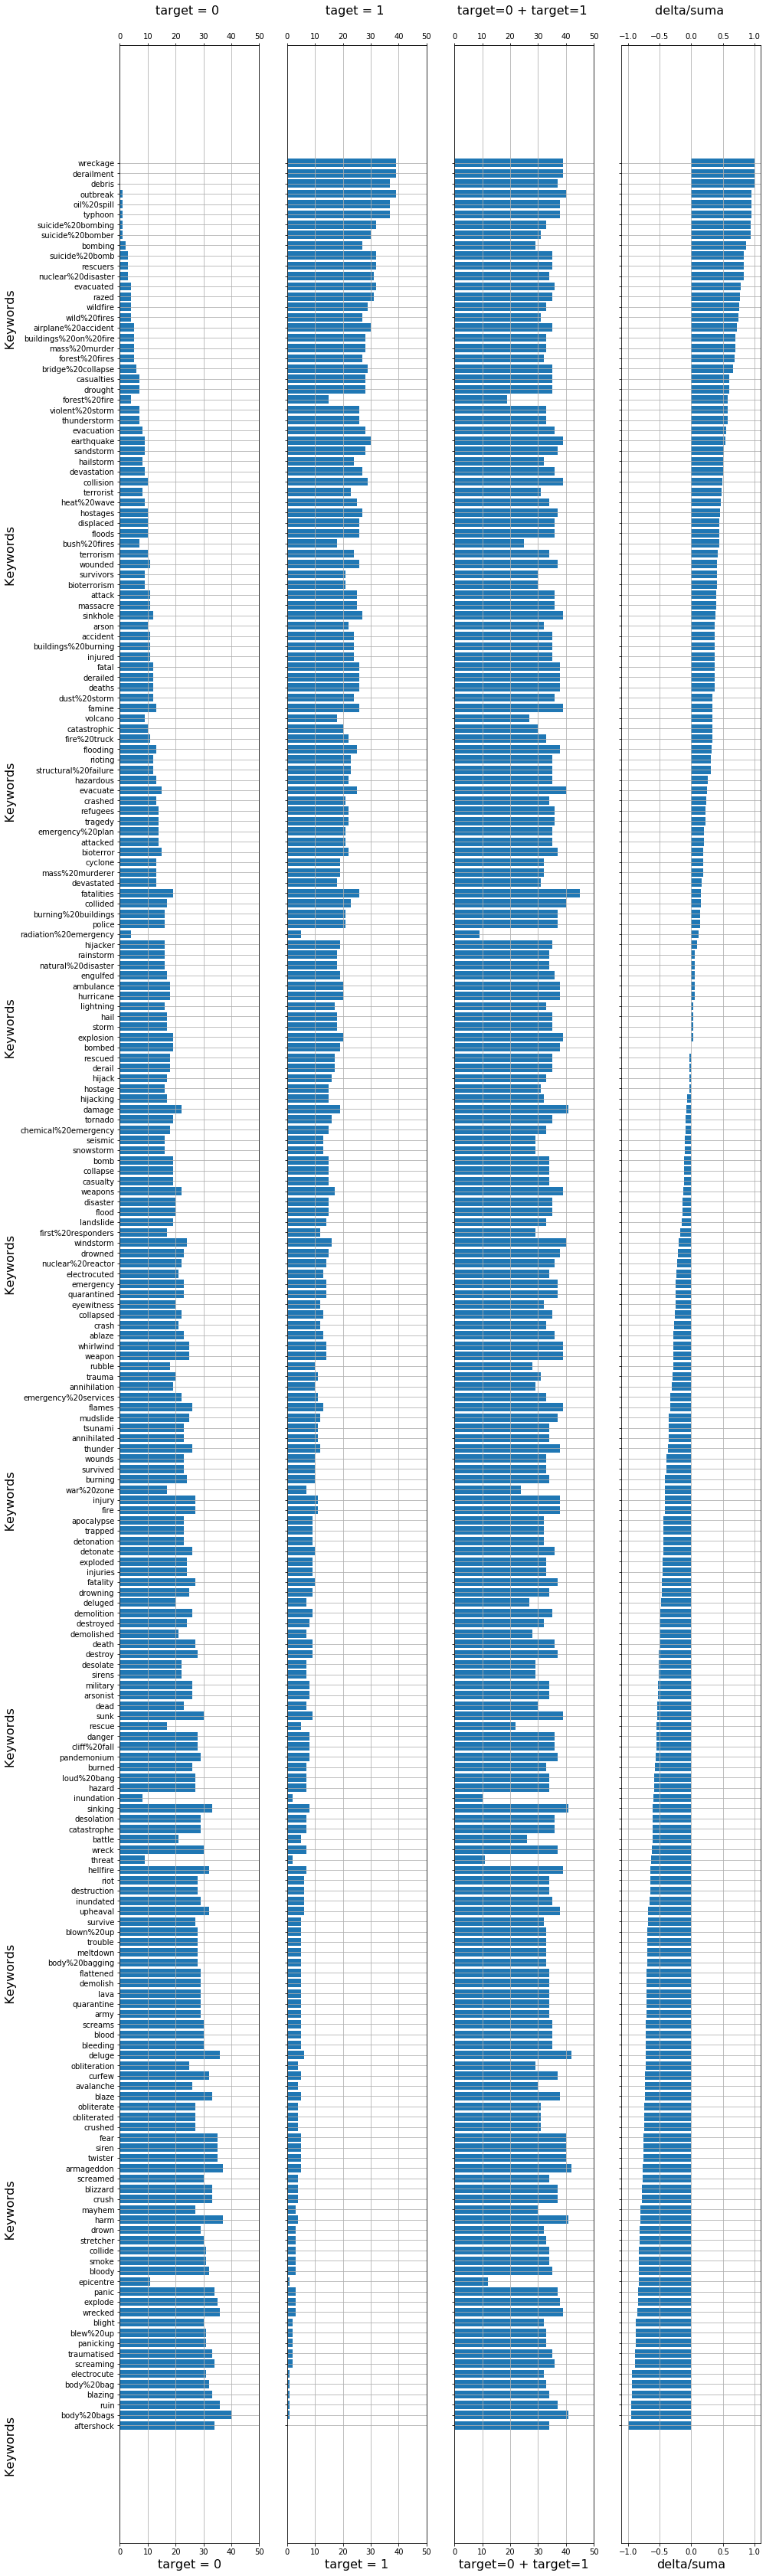

In [17]:
fig = plt.figure(figsize=(15,60))

ax1 = fig.add_subplot(141)
ax1.barh(g_sort_ds.index, g_sort_ds[0])
ax1.set_xlim(0,50)
ax1.grid()
ax1.set_title('target = 0 \n', fontsize=16)
ax1.secondary_xaxis('top')
ax1.set_ylabel(('Keywords'+' '*45)*10, fontsize=16)
ax1.set_xlabel('target = 0', fontsize=16)

ax2 = fig.add_subplot(142)
ax2.barh(g_sort_ds.index, g_sort_ds[1], tick_label='')
ax2.set_xlim(0,50)
ax2.grid()
ax2.set_title('taget = 1 \n', fontsize=16)
ax2.secondary_xaxis('top')
ax2.set_xlabel('target = 1', fontsize=16)

ax3 = fig.add_subplot(143)
ax3.barh(g_sort_ds.index, g_sort_ds['0+1'], tick_label='')
ax3.set_xlim(0,50)
ax3.grid()
ax3.set_title('target=0 + target=1 \n', fontsize=16)
ax3.secondary_xaxis('top')
ax3.set_xlabel('target=0 + target=1', fontsize=16)

ax4 = fig.add_subplot(144)
ax4.barh(g_sort_ds.index, g_sort_ds['delta/suma'], tick_label='')
ax4.grid()
ax4.set_title('delta/suma \n', fontsize=16)
ax4.secondary_xaxis('top')
ax4.set_xlabel('delta/suma', fontsize=16)

Podemos observar que hay un degradé en la asociación de keywords con target. Tomemos por ejemplo los 10 términos más asociados a desastres.

In [20]:
g_sort_ds.tail(20)

target,0,1,0+1,delta/suma
keyword,,,,
forest%20fires,5.0,27.0,32.0,0.687500
mass%20murder,5.0,28.0,33.0,0.696970
buildings%20on%20fire,5.0,28.0,33.0,0.696970
airplane%20accident,5.0,30.0,35.0,0.714286
wild%20fires,4.0,27.0,31.0,0.741935
wildfire,4.0,29.0,33.0,0.757576
razed,4.0,31.0,35.0,0.771429
evacuated,4.0,32.0,36.0,0.777778
nuclear%20disaster,3.0,31.0,34.0,0.823529


Al parecer, cuando se tuitea sobre ciertos temas se suele hablarse en serio. Es el caso de descarrilamientos, derrames de petróleo, tifones, atentados con bombas, desastres nucleares e incendios forestales, por ejemplo. Encontramos también algunos términos menos específicos, como por ejemplo wreckage (destrucción, muy genérico), debris (escombros: de atentado? De terremoto?), outbreak (de enfermedad tal vez), o rescuers (puede relacionarse con atentado, terremoto, incendio, inundación). Veamos como ejemplo 20 tweets asociados a wreckage.

In [34]:
wreckage = train[train['keyword']=='wreckage']
for z in wreckage['text'][:20]:
    print(z)

Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/SfAKQNveta
Wreckage Confirmed As Part of Missing Malaysia Airlines Flight MH370 http://t.co/yoPeYPJkb2 (VICE News)
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/gRh7zLK979
MH370 victim's family furious the media was told about wreckage confirmation first http://t.co/carMqiVkwU
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/cs8mYAunA4
#Australia #News ; RT janeenorman: 'High probability' aircraft wreckage is from #MH370 according to Deputy Prime Û_ http://t.co/cdOHgnJmsT
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/v5Ogr3F5N9
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those 

Hay una gran cantidad de tweets y retweets sobre la caída del avión de Malaysia Airlines, que usan el término wreckage. Veamos qué pasa con debris.

In [30]:
debris = train[train['keyword']=='debris']
for z in debris['text'][:20]:
    print(z)

#aerospace #exec Plane debris is from missing MH370 - Part of the aircraft wing found on Reunion Island is from th... http://t.co/S2wm8lh7oO
Malaysia Airlines Flight 370 that Disappeared 17months ago Debris Found South of The Indian Ocean - http://t.co/nrHURYSyPd
#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...  http://t.co/MRVXBZywd4
Discovered Plane Debris Is From Missing Malaysia Airlines Flight 370 | TIME http://t.co/7fSn1GeWUX
Confirmed the debris from MH370 ??
#?? #?? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...  http://t.co/q1GlK8plUD
Malaysia confirms plane debris washed up on Reunion Island is from Flight MH370 http://t.co/BMxsndx14g
#?? #???? #??? #??? MH370: Aircraft debris found on La Reunion is from missing Malaysia Airlines ...  http://t.co/hHWv0EUDFv
How Missing JetÛªs Debris Could Have Floated to RÌ©union - The New York Times http://t.co/pNnUnrnqjA
RÌ©union Debris Is Almost 

Estos tweets hablan del mismo tema, que causó mucho revuelo a nivel mundial en su momento.
Qué sucede con las keywords menos asociadas a desastres? Veamos el top ten.

In [32]:
g_sort_ds.head(20)

target,0,1,0+1,delta/suma
keyword,,,,
aftershock,34.0,0.0,34.0,-1.000000
body%20bags,40.0,1.0,41.0,-0.951220
ruin,36.0,1.0,37.0,-0.945946
blazing,33.0,1.0,34.0,-0.941176
body%20bag,32.0,1.0,33.0,-0.939394
electrocute,31.0,1.0,32.0,-0.937500
screaming,34.0,2.0,36.0,-0.888889
traumatised,33.0,2.0,35.0,-0.885714
panicking,31.0,2.0,33.0,-0.878788


Al parecer, si un tweet habla de body bags, deberíamos dudar seriamente de su correlación con un evento desgraciado. Parece haber una tendencia a términos poco específicos, como screaming, panicjing, bloody o smoke. En este caso encontramos wrecked en lugar de wreckage. Veamos a qué se asocia tomando una muestra de 20 tweets.

In [35]:
wrecked = train[train['keyword']=='wrecked']
for z in wrecked['text'][:20]:
    print(z)

Wrecked an hour on YouTube with @julian_lage @GrantGordy &amp; @RossMartin7 and now it's practice time again.
late night mcdonalds with friends = hilarious although my car is wrecked and there's half a steak pastie in the industrial estate
good luck to everyone who has school soon but your sleeping schedule is wrecked beyond repair
I wonder how times someone has wrecked trying to do the 'stare and drive' move from 2 Fast 2 Furious
Four hundred wrecked cars (costing $100 apiece) were purchased for the making of this 1986 film - http://t.co/DTdidinQyF
Cramer: IgerÛªs 3 words that wrecked DisneyÛªs stock ÛÒåÊCNBC http://t.co/PnlucERp0x
Poor Liv and I getting our phones wrecked on the same day @oliviaapalmerr #thatswhatfriendsarefor
On the freeway to Africa til I wrecked my Audi
Israel wrecked my home. Now it wants my land. 
https://t.co/g0r3ZR1nQj
#news Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/SF5JdNvdw9 #til_now #CNBC
James Kunstler: How bad architecture wrecked 

Wrecked su utiliza en contextos más variados, muchas veces metafórica y exageradamente. Esto nos indica que debemos ser cuidadosos a la hora de pensar en un filtrado de formas verbales, plurales, etc., para el TP 2.